In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import random

In [2]:
data = np.genfromtxt('advertising.csv', delimiter=',',skip_header = 1)
N = data.shape[0]
X = data[:, :3]
y = data[:, 3:]

def mean_normalization(X):
    N = len(X)
    maxi = np.max(X)
    mini = np.min(X)
    avg = np.mean(X)
    X = (X - avg) / (maxi - mini)
    X_b = np.c_[np.ones((N, 1)), X]
    return X_b, maxi, mini, avg

X_b, maxi, mini, avg = mean_normalization(X)

33217.851511336325


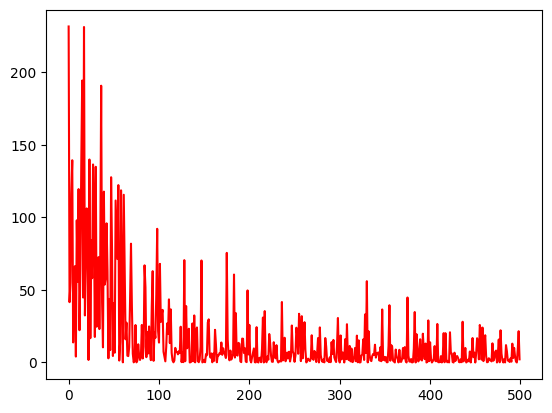

In [3]:
def stochastic_gradient_descent(X_b, y, n_epochs = 50, learning_rate = 0.00001):
    thetas = np.asarray ([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])

    theta_path = [thetas]
    losses = []

    for epoch in range(n_epochs):
        for i in range(N):
            random_index = i

            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]

            # Compute output
            output = xi.dot(thetas)

            # Compute loss l1
            loss = (output - yi) * (output - yi) / 2

            # Compute gradient for loss
            g_loss = (output - yi)

            # Compute gradient
            gradients = xi.T.dot(g_loss)

            # Update thetas
            thetas = thetas - learning_rate * gradients

            # logging
            theta_path.append(thetas)
            losses.append(loss[0][0])
            
    return theta_path, losses

sgd_theta, losses = stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.01)
print(np.sum(losses))
x_axis = list(range(500))
plt.plot(x_axis, losses[:500], color = 'r')
plt.show()

In [4]:
sgd_theta, losses = stochastic_gradient_descent(X_b, y, n_epochs=1, learning_rate=0.01)
print(np.sum(losses))

6754.643359356192


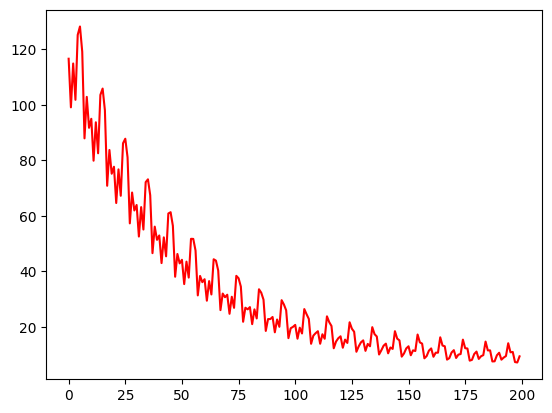

In [5]:
def mini_batch_gradient_descent(X_b, y, n_epochs = 50, minibatch_size = 20, learning_rate = 0.01):
    thetas = np.asarray ([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])

    thetas_path = [thetas]
    losses = []

    for epoch in range (n_epochs):
        # shuffled_indices = np. random . permutation (N) # uncomment this code for real application

        shuffled_indices = np . asarray ([21 , 144 , 17 , 107 , 37 , 115 , 167 , 31 , 3 ,
132 , 179 , 155 , 36 , 191 , 182 , 170 , 27 , 35 , 162 , 25 , 28 , 73 , 172 , 152 , 102 , 16 ,
185 , 11 , 1 , 34 , 177 , 29 , 96 , 22 , 76 , 196 , 6 , 128 , 114 , 117 , 111 , 43 , 57 , 126 ,
165 , 78 , 151 , 104 , 110 , 53 , 181 , 113 , 173 , 75 , 23 , 161 , 85 , 94 , 18 , 148 , 190 ,
169 , 149 , 79 , 138 , 20 , 108 , 137 , 93 , 192 , 198 , 153 , 4 , 45 , 164 , 26 , 8 , 131 ,
77 , 80 , 130 , 127 , 125 , 61 , 10 , 175 , 143 , 87 , 33 , 50 , 54 , 97 , 9 , 84 , 188 , 139 ,
195 , 72 , 64 , 194 , 44 , 109 , 112 , 60 , 86 , 90 , 140 , 171 , 59 , 199 , 105 , 41 , 147 ,
92 , 52 , 124 , 71 , 197 , 163 , 98 , 189 , 103 , 51 , 39 , 180 , 74 , 145 , 118 , 38 , 47 ,
174 , 100 , 184 , 183 , 160 , 69 , 91 , 82 , 42 , 89 , 81 , 186 , 136 , 63 , 157 , 46 , 67 ,
129 , 120 , 116 , 32 , 19 , 187 , 70 , 141 , 146 , 15 , 58 , 119 , 12 , 95 , 0 , 40 , 83 , 24 ,
168 , 150 , 178 , 49 , 159 , 7 , 193 , 48 , 30 , 14 , 121 , 5 , 142 , 65 , 176 , 101 , 55 ,
133 , 13 , 106 , 66 , 99 , 68 , 135 , 158 , 88 , 62 , 166 , 156 , 2 , 134 , 56 , 123 , 122 ,
154])
        
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, N, minibatch_size):
            xi = X_b_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]

            # Compute output
            output = xi.dot(thetas)

            # Compute loss l1
            loss = ((output - yi)**2)/2

            # Compute gradient for loss
            g_loss = (output - yi)/minibatch_size

            # Compute gradient
            gradients = xi.T.dot(g_loss)

            # Update thetas
            thetas = thetas - learning_rate * gradients
            thetas_path.append(thetas)

            loss_mean = np.sum(loss)/minibatch_size
            losses.append(loss_mean)

    return thetas_path, losses

mbgd_theta, losses = mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size=20, learning_rate=0.01)

x_axis = list(range(200))
plt.plot(x_axis, losses[:200], color = 'r')
plt.show()

In [6]:
mbgd_theta, losses = mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size=20, learning_rate=0.01)
print(np.sum(losses))

8865.64805883731


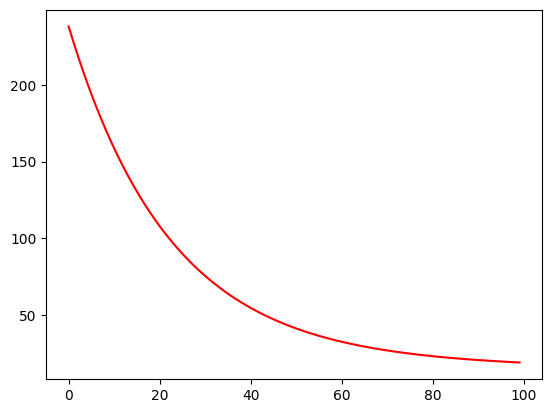

In [7]:
def batch_gradient_descent(X_b, y, n_epochs = 100, learning_rate =0.01):
    thetas = np.asarray ([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])

    thetas_path = [thetas]
    losses = []

    for epoch in range(n_epochs):
        # Compute output
        output = X_b.dot(thetas)

        # Compute loss l1
        loss = ((output - y)**2)

        # Compute gradient for loss
        g_loss = 2*(output - y)/N

        # Compute gradient
        gradients = X_b.T.dot(g_loss)

        # Update thetas
        thetas = thetas - learning_rate * gradients
        thetas_path.append(thetas)

        loss_mean = np.sum(loss)/N
        losses.append(loss_mean)

    return thetas_path, losses

bgd_theta, losses = batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01)

x_axis = list(range(100))
plt.plot(x_axis, losses[:100], color = 'r')
plt.show()

In [8]:
bgd_theta, losses = batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01)
print(np.sum(losses))

6716.458800156876


In [9]:
import pandas as pd

df = pd.read_csv('BTC-Daily.csv')
df = df.drop_duplicates()

df.head(10)

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07
5,1645660800,2022-02-24 00:00:00,BTC/USD,37253.26,39720.00,34324.05,38376.88,6302.850957,2.418838e+08
6,1645574400,2022-02-23 00:00:00,BTC/USD,38269.94,39303.24,37060.16,37274.18,1778.275258,6.628375e+07
7,1645488000,2022-02-22 00:00:00,BTC/USD,37036.98,38463.88,36368.99,38269.94,2388.759035,9.141766e+07
8,1645401600,2022-02-21 00:00:00,BTC/USD,38384.09,39494.11,36810.72,37076.60,3501.420364,1.298208e+08
9,1645315200,2022-02-20 00:00:00,BTC/USD,40108.62,40151.62,37974.18,38373.90,1283.511547,4.925334e+07


In [10]:
df.describe()

,unix,open,high,low,close,Volume BTC,Volume USD
count,2.651000e+03,2651.000000,2651.000000,2651.000000,2651.000000,2.651000e+03,2.651000e+03
mean,1.531613e+09,11693.189332,12038.562912,11296.539461,11709.326213,1.330041e+07,6.099369e+07
std,6.613247e+07,16272.554746,16739.237000,15718.297511,16282.908704,4.715366e+07,1.072838e+08
min,1.417133e+09,162.000000,212.840000,152.400000,162.000000,0.000000e+00,0.000000e+00
25%,1.474373e+09,654.680000,664.460000,640.050000,654.370000,5.357883e+03,9.516170e+03
50%,1.531613e+09,6408.950000,6540.000000,6312.000000,6407.770000,1.503310e+04,2.288982e+07
75%,1.588853e+09,10708.620000,10956.240000,10303.755000,10726.425000,3.435336e+06,8.018383e+07
max,1.646093e+09,67547.490000,69000.000000,66250.000000,67559.000000,7.723295e+08,1.446125e+09


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unix        2651 non-null   int64  
 1   date        2651 non-null   object 
 2   symbol      2651 non-null   object 
 3   open        2651 non-null   float64
 4   high        2651 non-null   float64
 5   low         2651 non-null   float64
 6   close       2651 non-null   float64
 7   Volume BTC  2651 non-null   float64
 8   Volume USD  2651 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 186.5+ KB


2014-11-28 to 2022-03-01


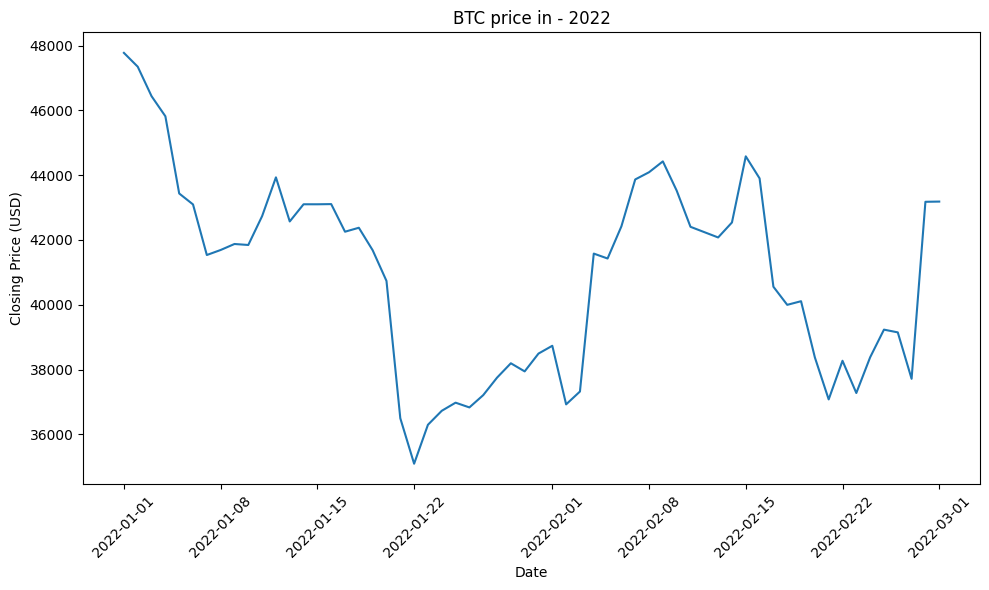

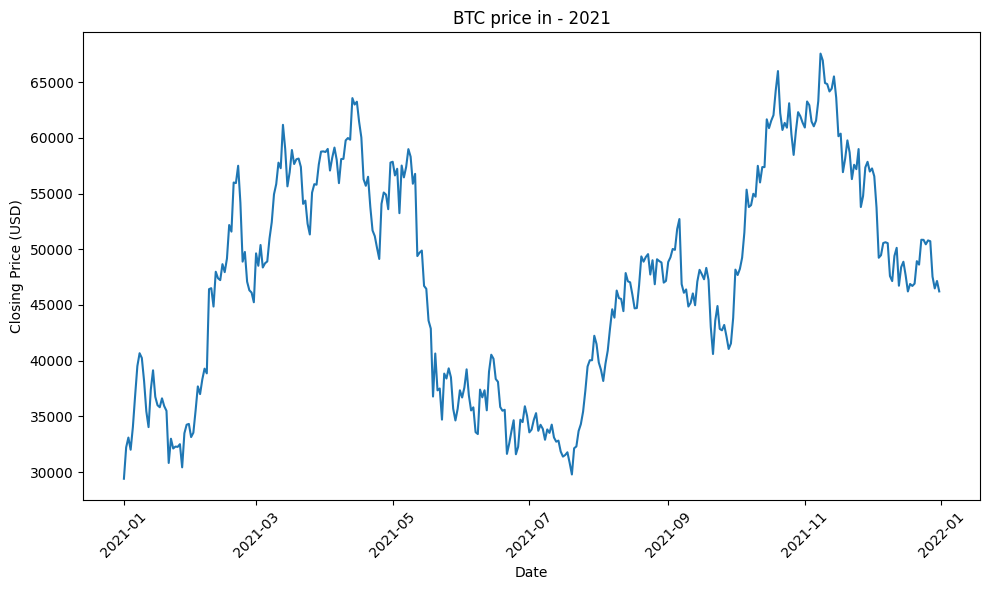

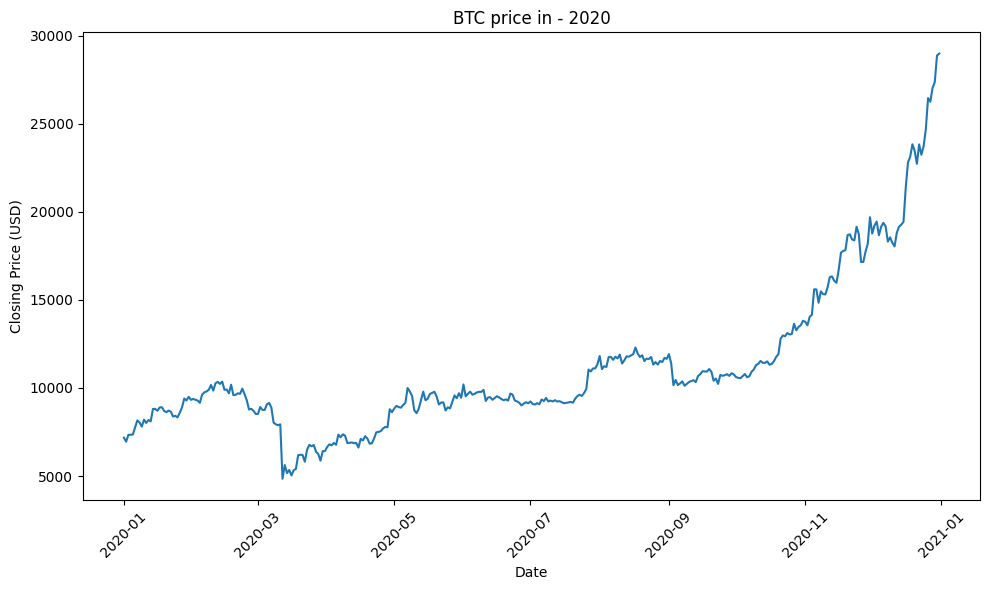

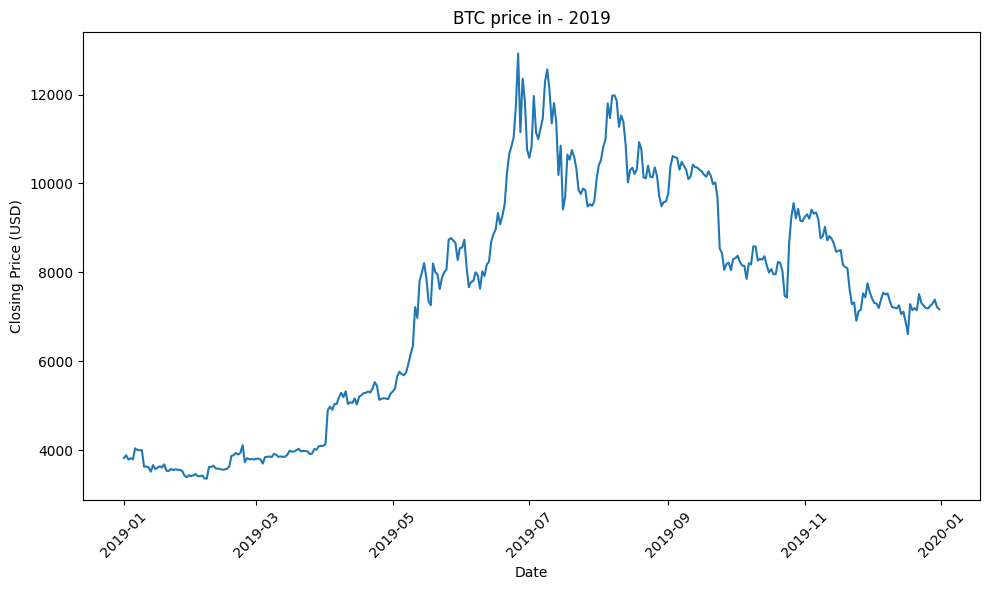

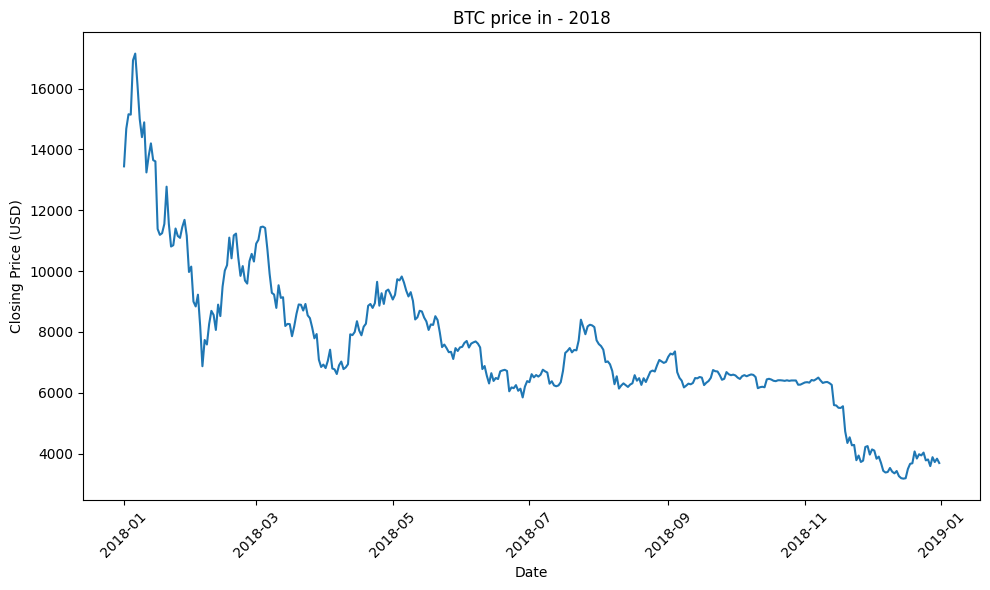

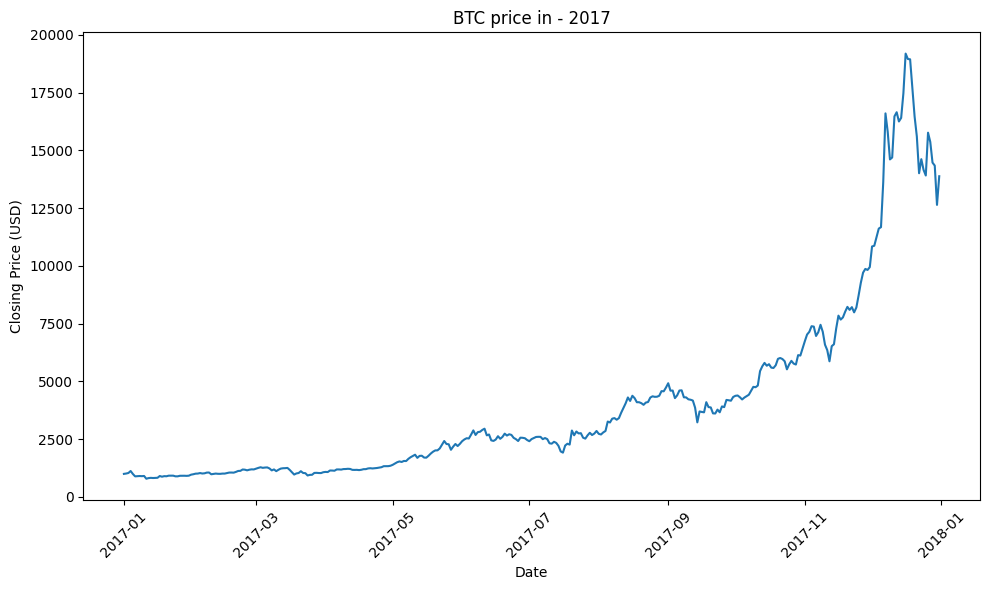

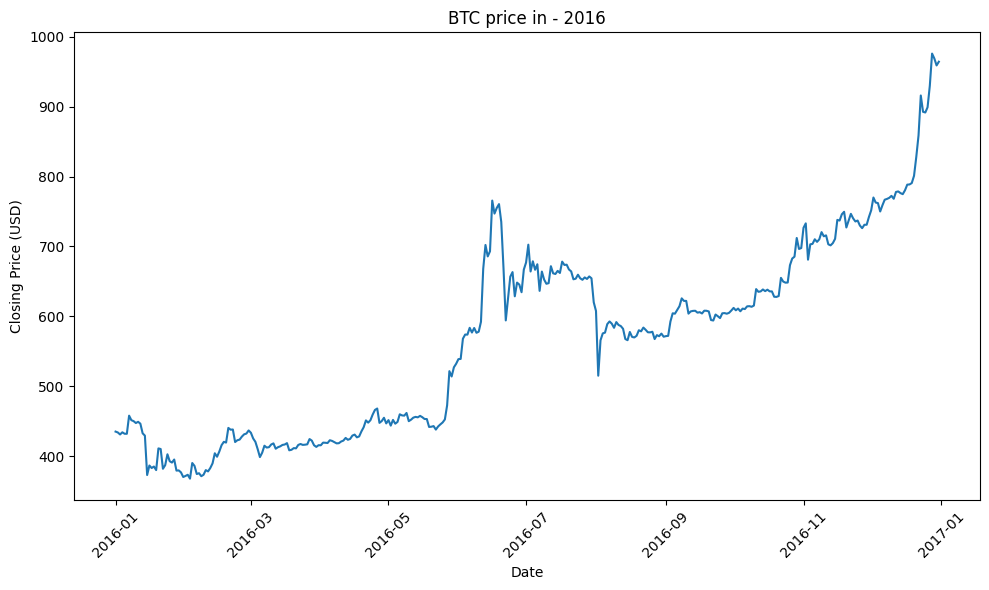

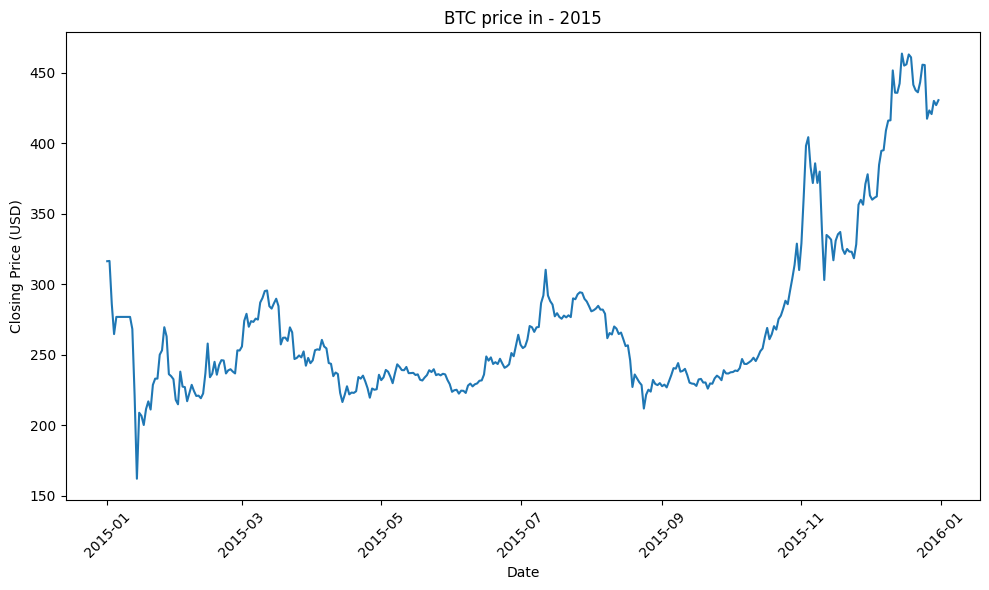

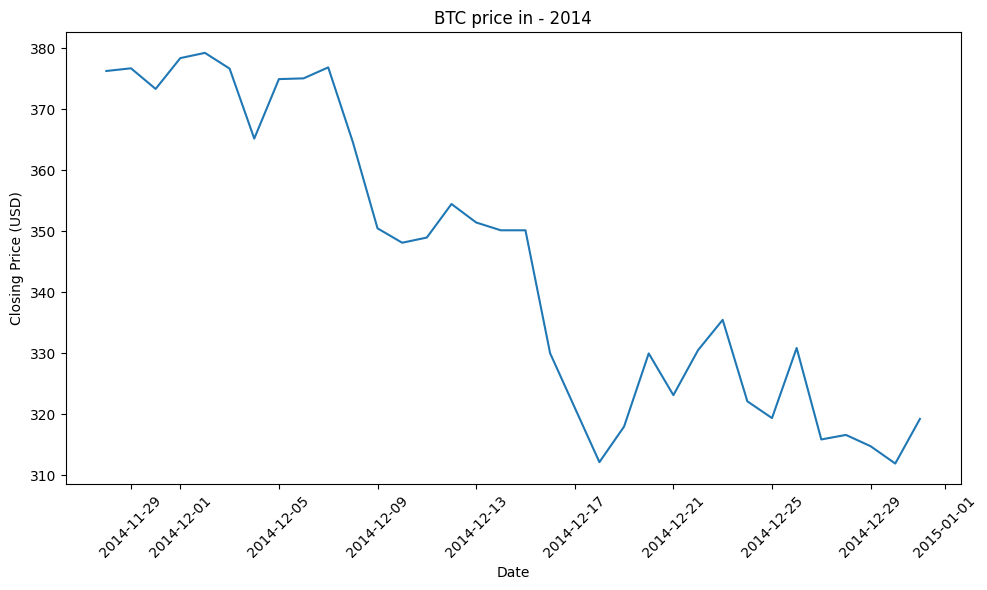

In [12]:
df['date'] = pd.to_datetime(df['date'])
date_range = str(df['date'].dt.date.min()) + ' to ' + str(df['date'].dt.date.max())
print(date_range)

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

unique_years = df['year'].unique()
for year in unique_years:

    dates = pd.date_range(start=str(year) + '-01-01', end=str(year) + '-12-31', freq='D')
    year_month_day = pd.DataFrame({'date': dates})
    year_month_day['year'] = year_month_day['date'].dt.year
    year_month_day['month'] = year_month_day['date'].dt.month
    year_month_day['day'] = year_month_day['date'].dt.day

    merged_data = pd.merge(year_month_day, df, on=['year', 'month', 'day'], how='left')

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(merged_data['date_x'], merged_data['close'])
    plt.title(f'BTC price in - {year}')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [13]:
! pip install mplfinance

C:\Users\quanb\AppData\Local\Temp\ipykernel_10656\2669108850.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = df_filtered['date'].map(mdates.date2num)


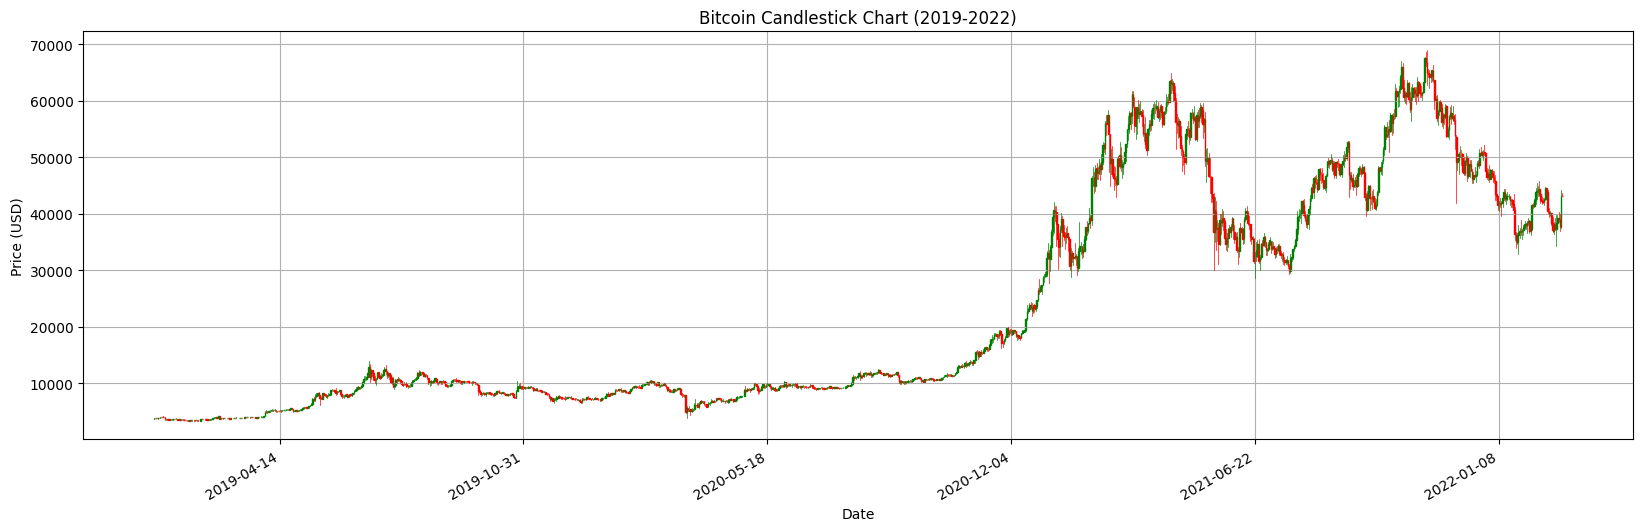

In [14]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
import datetime

# Filter data for 2019-2022
df_filtered = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2022-12-31')]

# Convert date to matplotlib format
df_filtered['date'] = df_filtered['date'].map(mdates.date2num)

# Create the candlestick chart
fig, ax = plt.subplots(figsize=(20, 6))

candlestick_ohlc(ax, df_filtered[['date', 'open', 'high', 'low', 'close']].values, width=0.6, colorup='g', colordown='r')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()

plt.title('Bitcoin Candlestick Chart (2019-2022)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)

# Save the plot as a PDF
plt.savefig('bitcoin_candlestick_2019_2022.pdf')

plt.show()


In [15]:
df.isnull().sum()

unix          0
date          0
symbol        0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
year          0
month         0
day           0
dtype: int64

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae

scalar = StandardScaler()

df["Standardized_Close_Prices"] = scalar.fit_transform(df["close"].values.reshape(-1,1))
df["Standardized_Open_Prices"] = scalar.fit_transform(df["open"].values.reshape(-1,1))
df["Standardized_High_Prices"] = scalar.fit_transform(df["high"].values.reshape(-1,1))
df["Standardized_Low_Prices"] = scalar.fit_transform(df["low"].values.reshape(-1,1))

df['date_str'] = df['date'].dt.strftime('%Y%m%d%H%M%S')

df['NumericalDate'] = pd.to_numeric(df['date_str'])

df.drop(columns=['date_str'], inplace=True)

X = df[["NumericalDate", "Standardized_Open_Prices", "Standardized_High_Prices", "Standardized_Low_Prices"]]
y = df["Standardized_Close_Prices"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42, shuffle=True)

In [17]:
def predict(X, w, b):
  return X.dot(w) + b

def gradient(y_hat, y, x):
    loss = y_hat-y
    dw = x.T.dot(loss)/len(y)
    db = np.sum(loss)/len(y)
    cost = np.sum(loss*2)/(2*len(y))
    return (dw,db, cost)

def update_weight(w,b,lr,dw,db):
    w_new = w - lr*dw
    b_new = b - lr*db
    return (w_new, b_new)

def linear_regression_vectorized(X, y, learning_rate=0.01, num_iterations=200):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)  # Initialize weights
    b = 0  # Initialize bias
    losses = []

    for _ in range(num_iterations):
        y_hat = predict(X, w, b)  # Make predictions
        dw, db, cost = gradient(y_hat, y, X)  # Calculate gradients
        w, b = update_weight(w, b, learning_rate, dw, db)  # Update weights and bias
        losses.append(cost)


    return w, b, losses


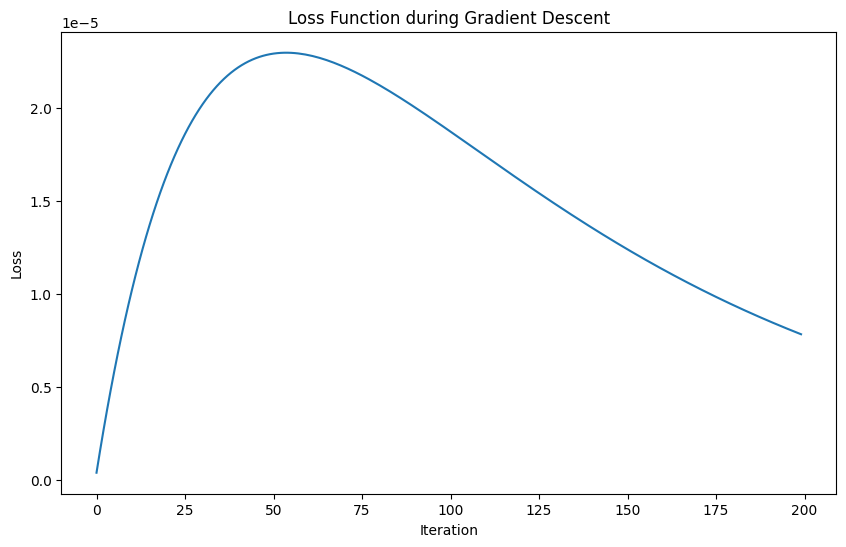

In [18]:
X = df[["Standardized_Open_Prices", "Standardized_High_Prices", "Standardized_Low_Prices"]]
y = df["Standardized_Close_Prices"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

b = 0
w = np.zeros(X_train.shape[1])
lr = 0.01
epochs = 200

w, b, losses = linear_regression_vectorized(X_train.values, y_train.values, lr, epochs)

# Plot the loss function
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Function during Gradient Descent')
plt.show()

In [19]:
from sklearn.metrics import r2_score

# Make predictions on the test set
y_pred = predict(X_test, w, b)

# Calculate RMSE
rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))

# Calculate MAE
mae = np.mean(np.abs(y_pred - y_test))

# Calculate MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100


# Calculate R-squared on training data
y_train_pred = predict(X_train, w, b)
train_accuracy = r2_score(y_train, y_train_pred)

# Calculate R-squared on testing data
test_accuracy = r2_score(y_test, y_pred)

print("Root Mean Square Error (RMSE):", round(rmse, 4))
print("Mean Absolute Error (MAE):", round(mae, 4))
print("Training Accuracy (R-squared):", round(train_accuracy, 4))
print("Testing Accuracy (R-squared):", round(test_accuracy, 4))

Root Mean Square Error (RMSE): 0.0293
Mean Absolute Error (MAE): 0.0138
Training Accuracy (R-squared): 0.9989
Testing Accuracy (R-squared): 0.9991
